In [2]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask

In [3]:
beacon_tif = rio.open("./k15_1_2_1_1_0.tif")
beacon_shp = gpd.read_file("./beacon_shapes.shp")
beacon_shp = beacon_shp.drop(6)
beacon_arr = np.array(beacon_tif.read(1))
beacon_meta= beacon_tif.meta

# Find the beacon shape

In [4]:
idx = 0

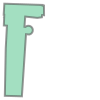

In [5]:
idx +=1
beacon_shp.iloc[idx].geometry

In [11]:
idx
print(beacon_shp.iloc[idx].geometry)

POLYGON ((152615.046012726 212495.1180041097, 152615.0417824132 212494.8652025713, 152615.5708860005 212494.8629403347, 152615.5981424023 212491.1575072743, 152614.854343469 212491.2116951793, 152614.769342232 212490.3715984058, 152612.9921022652 212490.1461055763, 152608.3728285411 212490.6467527943, 152608.0767575506 212486.732456076, 152608.4721559283 212486.6948092785, 152608.7591822487 212486.8970771544, 152609.1096024193 212487.0441371305, 152609.5062132843 212487.1106910286, 152609.9193125397 212487.0793421986, 152610.3122997696 212486.9487949368, 152610.652576569 212486.7343531968, 152610.9191460612 212486.4634196674, 152611.1058118013 212486.1659953203, 152611.2271732186 212485.8364783935, 152611.2789285063 212485.4599692728, 152611.2408802698 212485.0595705239, 152611.1041324463 212484.6685834527, 152610.8765893295 212484.3225074224, 152610.5816544241 212484.049039904, 152610.2511295486 212483.8614772577, 152609.9156146905 212483.7578158733, 152608.6684182276 212483.863363383

# mean height masked building

In [187]:
def shape_mean(tif, shape):
    out_image, out_transform = mask(tif, shapes=[shape], crop=True, invert=False)
    li = []
    for y in out_image[0]:
        for x in y:
            if x > 0:
                li.append(x)
    return np.array(li).mean()
shape_mean(beacon_tif, beacon_shp.iloc[26].geometry)

22.284498

# Add height columns to shapefile

In [190]:
beacon_shp["height"] = beacon_shp.geometry.apply(lambda x: shape_mean(beacon_tif, x))
max_height = beacon_shp.height.max()
print(max_height)

beacon_shp["color"] = beacon_shp.height.apply(lambda x:(1,x/max_height,.25))

/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  


46.67124557495117


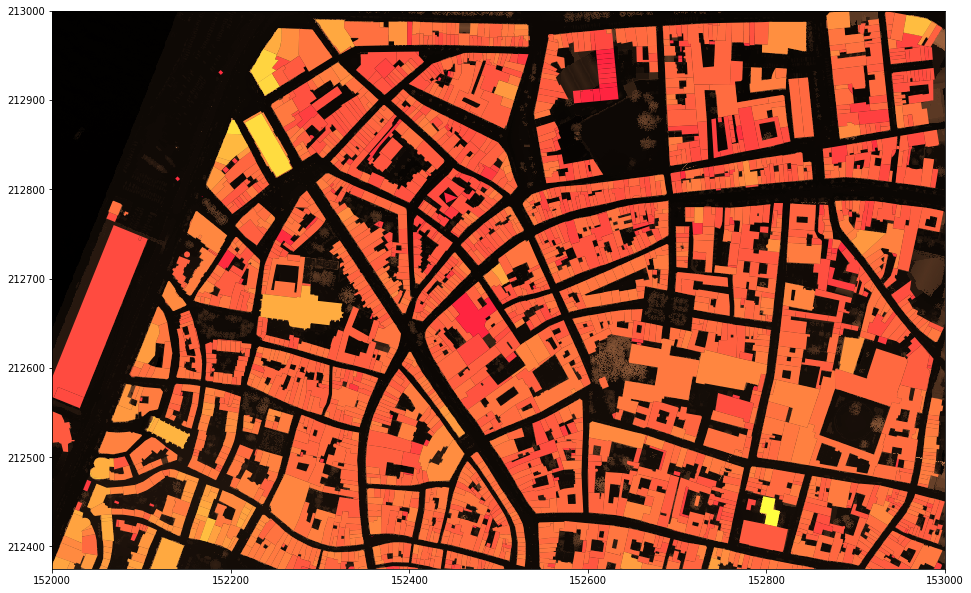

In [37]:
beacon_shp.plot(figsize=(16,16), color=beacon_shp.color)
show(beacon_tif, cmap="copper")